# Exploration of Khodak et al. sarcasm dataset

We work with a slightly converted dataset based on the [Khodak et al dataset](https://nlp.cs.princeton.edu/SARC/2.0/). 

Difference is that in the current dataset not the full ancestry of a comment is available, only the direct parent.

The present exploration touches on a number of aspects of the dataset of which the most important are:
* Length of comments
* Non-vocabulary language

Specific investigations might not have an observation or conclusion attached to them. That typically means that I saw no issue or potential improvement in them.

## Import a number of python modules we need in the course of this notebook

In [1]:
import pandas as pd
from seaborn import histplot

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Utility code in the local repository
from utils import has_markdown
has_markdown.__doc__

'Identify if a string contains common markdown based on a regular expression.'

## Exploring the training dataset

In [3]:
TRAIN_FILE = 'data/train.csv'

When importing the CSV into a DataFrame we convert the `comment`, `subreddit`, and `parent_comment` columns to the string type.

In [4]:
train_df = pd.read_csv(TRAIN_FILE, dtype={'comment': pd.StringDtype(), 'subreddit': pd.StringDtype(), 'parent_comment': pd.StringDtype()})

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909744 entries, 0 to 909743
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              909744 non-null  int64 
 1   label           909744 non-null  int64 
 2   comment         909697 non-null  string
 3   author          909744 non-null  object
 4   subreddit       909744 non-null  string
 5   score           909744 non-null  int64 
 6   ups             909744 non-null  int64 
 7   downs           909744 non-null  int64 
 8   date            909744 non-null  object
 9   created_utc     909744 non-null  object
 10  parent_comment  909744 non-null  string
dtypes: int64(5), object(3), string(3)
memory usage: 76.3+ MB


In [6]:
train_df['comment_length'] = train_df['comment'].str.len()
train_df['parent_comment_length'] = train_df['parent_comment'].str.len()

In [7]:
train_df[['label', 'score', 'ups', 'downs', 'comment_length', 'parent_comment_length']].describe(percentiles=[0.25, 0.50,0.75,0.99])

,label,score,ups,downs,comment_length,parent_comment_length
count,909744.0,909744.000000,909744.000000,909744.000000,909697.000000,909744.000000
mean,0.5,6.871109,5.493538,-0.145876,56.778736,133.607840
std,0.5,47.728379,41.205716,0.352982,60.912524,228.774808
min,0.0,-507.000000,-507.000000,-1.000000,1.000000,1.000000
25%,0.0,1.000000,0.000000,0.000000,27.000000,42.000000
50%,0.5,2.000000,1.000000,0.000000,46.000000,75.000000
75%,1.0,4.000000,3.000000,0.000000,74.000000,145.000000
99%,1.0,88.000000,75.000000,0.000000,207.000000,953.000000
max,1.0,7563.000000,5163.000000,0.000000,10000.000000,23306.000000


**Observations**: 

* Equal number of sarcasm and non-sarcasm labels
* `Comment` length significantly shorter than `parent_comment` length
* Some comments and parent comments are **very long**.
* The length of `comment` of the 99% percentile comfortably fits an easily processed input, whereas that of the `parent_comment` is rather long.

In [8]:
train_df.head()

,id,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,comment_length,parent_comment_length
0,1,0,"""""I like my shortstops how I like my beef... i...",yourstrulytony,Dodgers,3,3,0,2016-06,2016-06-10 16:13:47,Need my Dodgerbros help returning fire at my c...,143,212
1,2,1,He works in mysterious ways,polarbear2217,atheism,1,1,0,2013-01,2013-01-26 23:59:33,"My cousin was perfect when he was born, except...",27,276
2,3,0,You're right,ineedtotakeashit,news,18,18,0,2015-11,2015-11-11 23:12:16,"Not defending the deplorable scam, but the per...",12,270
3,4,0,Is this amount of meat in the ratio of meat to...,HylianHal,FoodPorn,3,3,0,2016-08,2016-08-20 06:35:45,"I'm on my break from 4th st Deli right now, th...",61,78
4,5,0,You can hug and kiss my ass X and O,ShyTownNinja_NasFlo,BlackPeopleTwitter,2,2,0,2016-05,2016-05-04 15:18:15,can yall pls stop reposting this one. it aint ...,35,79


In [9]:
count_subreddit_df = train_df[['id','subreddit']].groupby("subreddit").count().sort_values(by='id', ascending=False).reset_index()

In [10]:
count_subreddit_df.head(10)

,subreddit,id
0,AskReddit,59039
1,politics,35377
2,worldnews,23705
3,leagueoflegends,18978
4,pcmasterrace,17147
5,funny,16082
6,news,15162
7,pics,14550
8,todayilearned,12738
9,nfl,12725


In [11]:
sum_label_subreddit_df = train_df[['subreddit', 'label']].groupby("subreddit").sum('label').sort_values(by='label', ascending=False).reset_index()

In [12]:
sum_label_subreddit_df.head(10)

,subreddit,label
0,AskReddit,23692
1,politics,21414
2,worldnews,15224
3,leagueoflegends,10303
4,pcmasterrace,9679
5,news,9164
6,funny,7269
7,pics,7049
8,todayilearned,7018
9,AdviceAnimals,6885


In [13]:
subreddit_df = train_df[['subreddit', 'label']]
subreddit_df['is_pos'] = subreddit_df['label'] == 1
subreddit_df['is_neg'] = subreddit_df['label'] == 0

<ipython-input-13-11e8c1e5ab91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df['is_pos'] = subreddit_df['label'] == 1
<ipython-input-13-11e8c1e5ab91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_df['is_neg'] = subreddit_df['label'] == 0


In [14]:
subreddit_df.head()

,subreddit,label,is_pos,is_neg
0,Dodgers,0,False,True
1,atheism,1,True,False
2,news,0,False,True
3,FoodPorn,0,False,True
4,BlackPeopleTwitter,0,False,True


## Extremes: how about long comments?

Below I have a look at long comments. I saw no reason to give them a special treatment.

In [15]:
LONG_CUT_OFF = 300
long_df = train_df[train_df['comment_length'] > LONG_CUT_OFF]
print(f'Found {long_df.shape[0]} comments longer than {LONG_CUT_OFF} characters out of total of {train_df.shape[0]} comments => proportion: {long_df.shape[0]/train_df.shape[0]:0.4f}')

Found 1870 comments longer than 300 characters out of total of 909744 comments => proportion: 0.0021


In [16]:
# Let's see some examples of long comments
long_df['comment'].tolist()[:5]

['celtics 2100 - 2099 - 2098 - 2097 - 2096 - 2095 - 2094 - 2093 - 2092 - 2091 2090 - 2089 - 2088 - 2087 - 2086 - 2085 - 2084 - 2083 - 2082 - 2081 2080 - 2079 - 2078 - 2077 - 2076 - 2075 - 2074 - 2073 - 2072 - 2071 2070 - 2069 - 2068 - 2067 - 2066 - 2065 - 2064 - 2063 - 2062 - 2061 2060 - 2059 - 2058 - 2057 - 2056 - 2055 - 2054 - 2053 - 2052 - 2051 2050 - 2049 - 2048 - 2047 - 2046 - 2045 - 2044 - 2043 - 2042 - 2041 2040 - 2039 - 2038 - 2037 - 2036 - 2035 - 2034 - 2033 - 2032 - 2031 2030 - 2029 - 2028 - 2027 - 2026 - 2025 - 2024 - 2023 - 2022 - 2021 2020 - 2019 nba champs',
 'There is no official info about it because they abandoned the story ark that included him long time ago but it has been said that the real Swain is either dead or lost and locked inside his own mind, and what we see is Beatrice (i think that was his name), the bird, who is actually like a daemon or a monster that took control of the body... you get the point',
 'But two is not enough to give full coverage, giving fo

### Non-grammatical comments

In [17]:
def non_grammar(comment):
    """Find non-grammatical expressions"""
    no_string = not isinstance(comment, str)
    if no_string:
        return True
    else:
        has_quotes = comment.find('"') >= 0
        has_underscore = comment.find('_') >= 0
        has_emoticons = comment.find(':-)') >= 0 or comment.find(':-(') >= 0
        has_markdown = comment.find('~~') >= 0 or \
            comment.find('**') >= 0 or \
            comment.find('__') >= 0 or \
            comment.find('](http://') >= 0
        return has_quotes or has_underscore or has_emoticons or has_markdown

In [18]:
comments = train_df['comment'].to_list()
comments_only_non_grammar = list(filter(lambda x: non_grammar(x), comments))
f'found {len(comments_only_non_grammar)} out of total of {train_df.shape[0]} items'

'found 40527 out of total of 909744 items'

In [19]:
comments_only_non_grammar[:10]

['""I like my shortstops how I like my beef... injected full of hormones""- picture of Delvin Perez and Jhonny Peralta and a roided out bull/cow.',
 'Absolutely love the bass line in ""Long View"" by Green Day',
 '""somehow"" Obviously you think they have good plot.',
 'Will we hear the NYCFC ""we don\'t give a crud"" chant in FIFA 17?',
 'Barring the article, I thought it was a pretty accurate representation of the acclaimed, ""Rock award winning"" artist.',
 '""Butch"", like every other word they use, means exactly what they want it to mean at the moment they use it - that is, it means whatever makes it easiest to end the sentence with, ""...and that\'s why trans people are bad.""',
 'I\'ll never forget having ""Slaver"" branded on my characters forehead, that was a bit of karmic retribution on my part.',
 'thats fun then -_-',
 '""They are occupying Gaza!""',
 "Others have posted some really great stuff, but [here's](http://pillarsofcatholicism.com) some videos about both philosophy

### Reddit and markdown

[Markdown on Reddit](https://www.reddit.com/wiki/markdown) is well described. However, the current format came into use in September 2018. The content of our dataset was created before that date.



In [20]:
markdown_df = train_df[train_df['comment'].apply(has_markdown)]
f'Found {markdown_df.shape[0]} items conforming to the markdown regex'

'Found 4320 items conforming to the markdown regex'

In [21]:
markdown_list = markdown_df[['comment', 'label']].to_records(index=False)
markdown_list[:20]

rec.array([("Others have posted some really great stuff, but [here's](http://pillarsofcatholicism.com) some videos about both philosophy *and* theology from some of the professors at JPCatholic (Newman guide school).", 0),
           ('""Now excuse me as I take these Cleveland Browns to ~~the super bowl~~ my mouth!""', 0),
           ('It was (m)y **privilege** you CIS scum!', 1),
           ('Yeah but Bushes War Crimes are nothing in comparison to **BENGHAZI**, will you not think of the victims families?', 1),
           ('**Rabble Rabble** The cyclist is not wearing a helmet so all accidents are their fault.', 1),
           ('Should have watched **before** criticizing my post.', 0),
           ('This deserves a new meme **Good guy nazi**', 1),
           ('That sounds kinda **stalker**y. Do you do this at **night**?', 0),
           ('Exactly, comparing Scandinavian countries relationships to ~~North~~ Best and South Korea totally makes sense.', 1),
           ("It must be your imag

### Authors

Can the author be a good predictor? That would be the case if several prolific authors were being serial sarcasts.

In [22]:
author_freq_df = train_df[['author', 'id']].groupby('author').count().sort_values(by='id', ascending=False)
f"Found {author_freq_df[author_freq_df['id'] > 4].shape[0]} different authors"

'Found 43113 different authors'

In [23]:
author_freq_df = author_freq_df.reset_index()

<AxesSubplot:>

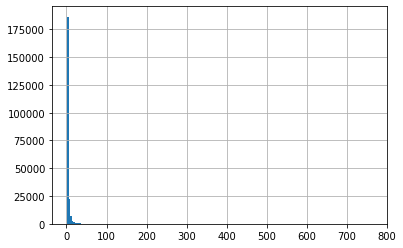

In [24]:
sub_freq_df = author_freq_df[author_freq_df['id'] > 1]
sub_freq_df['id'].hist(bins=200)

### Tip for data cleaning

> the dataset was preprocessed by filtering some unwanted items that could reduce the classification performance, such as user mention, URL links, hashtags, foreign language characters, stop words removal, and non-English ASCII character.

[link](https://ieeexplore.ieee.org/document/9383219)

## Test file

In [25]:
TEST_FILE = 'data/test.csv'
test_df = pd.read_csv(TEST_FILE, dtype={'comment': pd.StringDtype(), 'subreddit': pd.StringDtype(), 'parent_comment': pd.StringDtype()})
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101082 entries, 0 to 101081
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              101082 non-null  int64 
 1   comment         101076 non-null  string
 2   author          101082 non-null  object
 3   subreddit       101082 non-null  string
 4   score           101082 non-null  int64 
 5   ups             101082 non-null  int64 
 6   downs           101082 non-null  int64 
 7   date            101082 non-null  object
 8   created_utc     101082 non-null  object
 9   parent_comment  101082 non-null  string
dtypes: int64(4), object(3), string(3)
memory usage: 7.7+ MB
